## Autograd 가 필요한 이유 ?
##### 우리는 모델을 훈련할 때 손실을 최소화하려고 한다. 학습 가중치를 조절하여 손실이 0이 되도록 한다. 그런데, 가중치를 어떤 방향, 혹은 어느 정도로 값을 설정해야 할 지 모른다. 그래서, 1차 도함수를 만든다.
##### 모든 활성화 함수 및 기타 모든 수학적 모델들의 매개변수에 대한 도함수는 로컬 그래디언트 곱의 합이다. 즉, 계산 그래프를 통해서 측정할려는 기울기 값이다. 특히, 학습 가중치에 대한 기울기가 중요하다. 그것들은 어떤 방향으로 변경해야 하는지 알려준다.

* Autograd : Automatic gradient calculating API
* forward와 backward를 가능하게 한다.
* 즉, 해당 변수가 계산되는 데에 사용했던 모든 변수들의 미분값을 구하면서 forward 또는 backward를 진행하게 한다.
* 해당 변수가 계산되어 온 history를 Computational Graph로 가지고 있어서 이러한 동작이 가능한 것이다.

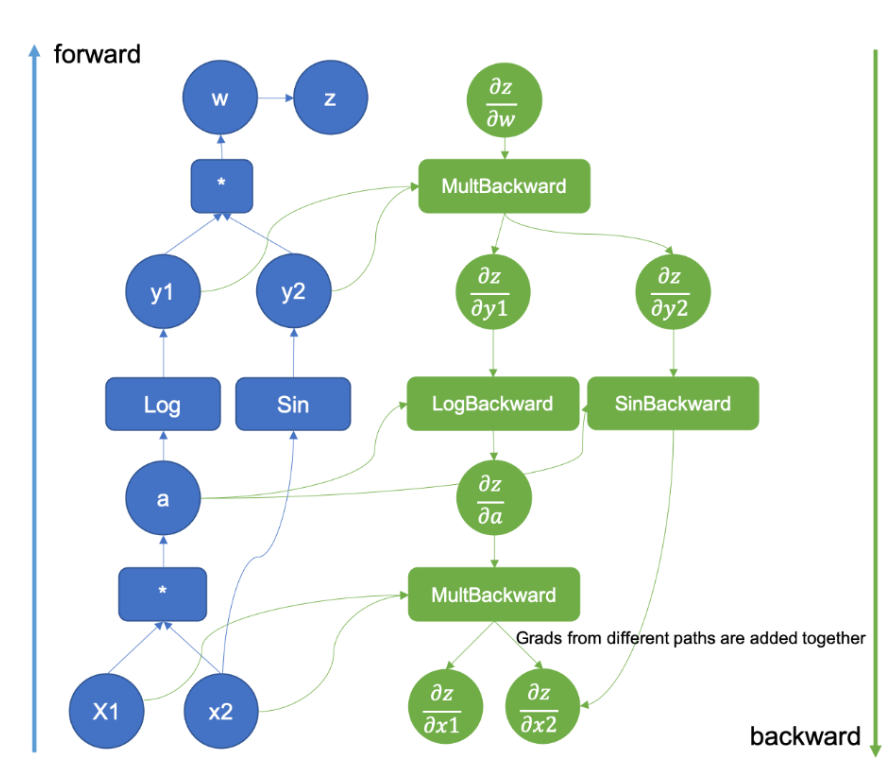

In [6]:
import torch

# requires_grad=True : 연산 추적
x = torch.ones(2,2, requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [7]:
y = x + 1
y

tensor([[2., 2.],
        [2., 2.]], grad_fn=<AddBackward0>)

In [9]:
z = 2*y ** 2
res = z.mean()
res

tensor(8., grad_fn=<MeanBackward0>)

In [10]:
# 역전파 계산
res.backward()

In [11]:
x.grad

tensor([[2., 2.],
        [2., 2.]])

##### 위 코드의 계산과정을 알아보자
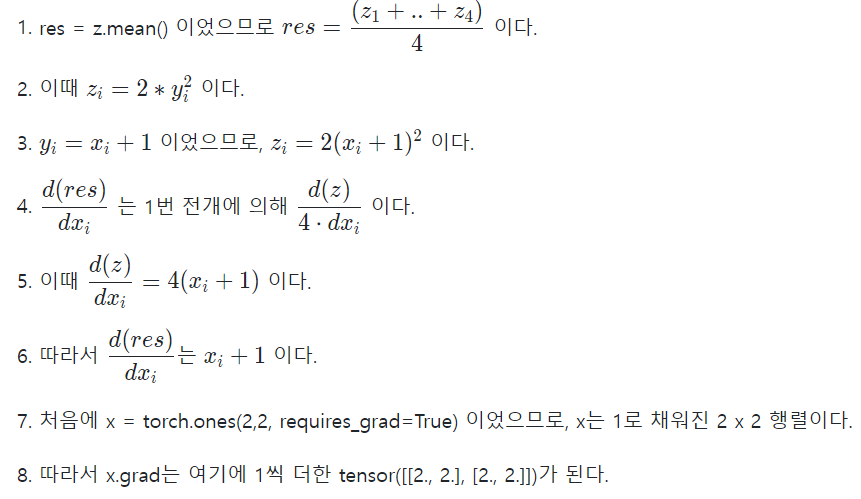

## autograd 사용 시 주의할 점
* 순전파/역전파를 적용할 변수를 선언할 때 requires_grad=True로 해야 x의 연산들을 추적한다.
* backward를 두 번 호출하게 되면 에러가 발생한다. backward 호출 시 메모리적으로 날려버린다. 또 호출하고 싶다면 처음 backward 시에 retain_graph=True 옵션을 주자(이전 미분 결과값에 누적되어 더해지는 식으로 계산 수행한다.)
* retain_graph=True를 안하더라도 zero_grad()를 해주지 않으면 gradient 결과값들이 계속 누적된다.
* autograd를 일시적으로 끄고 싶다면 requires_grad=False 두거나 with torch.no_grad(): 함수 안에 끄고 싶은 연산들을 넣자.

## Computational Graph를 통한 autograd 동작 원리
##### 위에서 변수가 계산되어 온 history를 Computational Graph 형태로 가지고 있다.
##### 이때 각 변수의 미분연산을 grad_fn 이라는 클래스 객체로서 각각의 연산이 무엇인지 Conputational Graph에 저장된다. (e.g. grad_fn=<AddBackward0>)

즉,
1. .backward를 하면 역전파가 시작되고,
2. 해당 변수의 미분연산 .grad_fn 클래스가 호출이 되면서 미분값들이 계산되며,
3. 이 값이 .grad에 누적되면서 모든 노드에 대한 역전파가 일어난다.